In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt

os.getcwd()

'c:\\Users\\matte\\OneDrive\\Desktop\\Università\\Trieste\\Second_year\\HPC21\\Cozzini\\MPI\\Assignment1\\Jacobi\\thin_jacobi_nodes'

In [2]:
def get_averages(filename):
    colnames = ['Maxtime [s]', 'Mintime [s]', 'JacobiMin [s]', 'JacobiMax [s]', 'Residuals', 'MLUPs']
    data_frame = pd.read_csv(filename, names=colnames, header=None)
    averages = data_frame.mean(axis=0)
    return round(averages, 3)

In [3]:
filenames = ['thin_nodes_4.csv', 'thin_nodes_8.csv', 'thin_nodes_12.csv', 'thin_nodes_16.csv', 'thin_nodes_24.csv', 'thin_nodes_48.csv']
Maxtimes = []
Mintimes = []
JacobiMin = []
JacobiMax = []
Residuals = []
MLUPs = []

for filename in filenames:
    averages = get_averages(filename)
    Maxtimes.append(averages[0])
    Mintimes.append(averages[1])
    JacobiMin.append(averages[2])
    JacobiMax.append(averages[3])
    Residuals.append(averages[4])
    MLUPs.append(averages[5])

Maxtimes = np.array(Maxtimes)
Mintimes = np.array(Mintimes)
JacobiMax = np.array(JacobiMax)
JacobiMin = np.array(JacobiMin)
Residuals = np.array(Residuals)
MLUPs = np.array(MLUPs)

#### Performance

In [4]:
def theoretical_comm_time(c,B,k,latency):
        return c/B + latency*k

def theoretical_perf(N, L, time, communic_time):
    L_3 = L**3/10**6
    return (L_3 * N) / 15.334 # T_s estimated via computation on single core

In [7]:
def plot_performance(JacobiMax, MLUPs):

    L = 1200
    N = np.array([1,4,8,12,16,24,48])

    const = L**2 * 2 * 8 # bytes
    c_4 = const * 4
    c_8 = const * 6
    c_12 = const * 6
    c = np.array([0, c_4, c_8, c_12, c_12, c_12, c_12])
    c = c/10**(6) # Mb
    k = np.array([0,4,6,6,6,6,6])
 
    latency = 4.07*10**(-6) # seconds
    B = 12162 # Mb/s

    theoretical_c_time = theoretical_comm_time(c,B,k,latency) # seconds

    JacobiMax = np.insert(JacobiMax, 0, 15.067) #seconds

    theoretical_performance = theoretical_perf(N, L, JacobiMax, theoretical_c_time) # MLUP/s

    MLUPs = np.insert(MLUPs, 0, 112.692)

    plt.figure()
    plt.scatter(N, MLUPs)
    plt.plot(N, MLUPs, label='Measured performance')
    plt.scatter(N, theoretical_performance, alpha=0.7, marker='v')
    plt.plot(N, theoretical_performance, label='Theoretical performance', alpha=0.7)
    plt.title('Node-to-node')
    plt.xlabel("Number of processes")
    plt.ylabel('Performance [MLUPs/s]')
    plt.legend()
    plt.show()


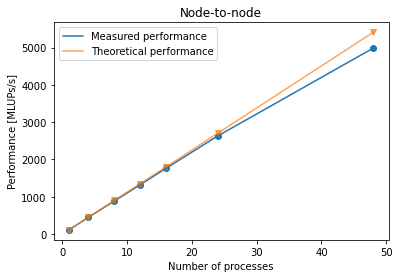

In [8]:
plot_performance(JacobiMax, MLUPs)

Communication time

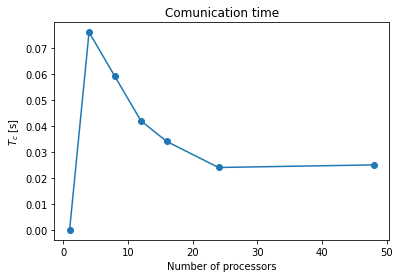

In [4]:
comm_time = np.subtract(Maxtimes, JacobiMax)
comm_time = np.insert(comm_time, 0, 0)
N = np.array([1,4,8,12,16,24,48])

plt.figure()
plt.scatter(N, comm_time)
plt.plot(N,comm_time)
plt.title('Comunication time')
plt.xlabel("Number of processors")
plt.ylabel(r'$T_c$'+" [s]")
plt.show()

MLUPs as output of the program

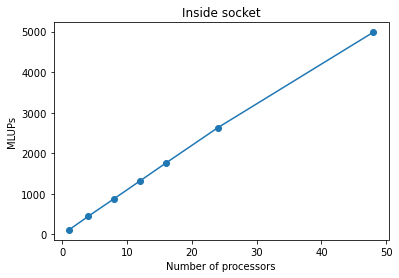

In [9]:
sc_MLUPs = 112.692

MLUPs = np.insert(MLUPs, 0, sc_MLUPs)
N = np.array([1,4,8,12,16,24,48])

plt.figure()
plt.scatter(N, MLUPs)
plt.plot(N,MLUPs)
plt.title('Inside socket')
plt.xlabel("Number of processors")
plt.ylabel("MLUPs")
plt.show()

In [21]:
MLUPs

array([ 449.59 ,  884.002, 1322.73 , 1763.49 , 2632.35 , 4983.994])

Communication time

Total runtime

In [16]:
len(Maxtimes)

6

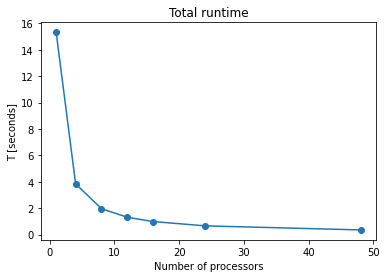

In [5]:
sc_thin_Maxtime = 15.334

Maxtimes = np.insert(Maxtimes, 0, sc_thin_Maxtime)
N = np.array([1,4,8,12,16,24,48])

plt.figure()
plt.scatter(N, Maxtimes)
plt.plot(N, Maxtimes)
plt.title('Total runtime')
plt.xlabel("Number of processors")
plt.ylabel("T [seconds]")
plt.show()


#### communication vs runtime

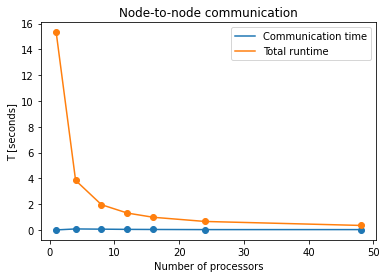

In [6]:
plt.figure()
plt.scatter(N, comm_time)
plt.plot(N,comm_time, label='Communication time')
plt.scatter(N, Maxtimes)
plt.plot(N, Maxtimes, label='Total runtime')
plt.title('Node-to-node communication')
plt.xlabel("Number of processors")
plt.ylabel("T [seconds]")
plt.legend()
plt.show()

Speedup

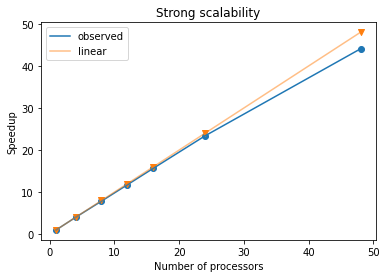

In [18]:
speedup = np.divide(Maxtimes[0], Maxtimes)

plt.figure()
plt.scatter(N, speedup)
plt.plot(N, speedup, label='observed')
plt.scatter(N,N, marker="v")
plt.plot(N,N, label = 'linear', alpha=0.5)
plt.title('Strong scalability')
plt.xlabel("Number of processors")
plt.ylabel("Speedup")
plt.legend()
plt.show()

In [19]:
speedup

array([ 1.        ,  3.98907388,  7.84347826, 11.74119449, 15.64693878,
       23.375     , 44.06321839])

Efficiency

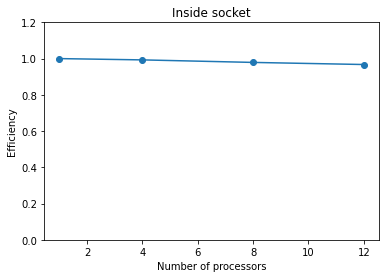

In [55]:
efficiency = np.divide(speedup, N)

plt.figure()
plt.scatter(N, efficiency)
plt.plot(N, efficiency)
plt.ylim((0,1.2))
plt.title('Inside socket')
plt.xlabel("Number of processors")
plt.ylabel("Efficiency")
plt.show()

Comunication time

In [ ]:
comm_time = np.insert(Maxtimes, 0, sc_thin_Maxtime)

In [72]:
L = 120

def fun(N):
    return N ** (1. / 3) * L

N = np.array([2,4,6,8,10,12,16,20,24,48,64,96])

weak_L = np.round(fun(N), 0)
weak_L

array([151., 190., 218., 240., 259., 275., 302., 326., 346., 436., 480.,
       549.])